The simulation is run for $N = \{100,200,500\}$ and $\mu =\{\pm 50,\pm 200\}$

In [1]:
import numpy as np
import numpy.random as npr
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import math

ModuleNotFoundError: No module named 'seaborn'

In [2]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')
rc('font', serif='times')
#rc('font', weight='bolder')
rc('mathtext', default='sf')
rc("lines", markeredgewidth=1)
rc("lines", linewidth=1)
rc('axes', labelsize=15) #24
rc("axes", linewidth=1) #2)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15) #16
rc('ytick', right='True',direction= 'in')
rc('xtick', top='True',direction= 'in')
rc('xtick.major', pad=8) #8)
rc('ytick.major', pad=8) #8)
rc('xtick.major', size=8) #8)
rc('ytick.major', size=8) #8)
rc('xtick.minor', size=5) #8)
rc('ytick.minor', size=5) #8)

def set_tick_sizes(ax, major, minor):
    for l in ax.get_xticklines() + ax.get_yticklines():
        l.set_markersize(major)
    for tick in ax.xaxis.get_minor_ticks() + ax.yaxis.get_minor_ticks():
        tick.tick1line.set_markersize(minor)
        tick.tick2line.set_markersize(minor)
    ax.xaxis.LABELPAD=10.
    ax.xaxis.OFFSETTEXTPAD=10.

In [ ]:
alpha = 1
beta = 1
a = 1.0 #[-a,a] denotes the interval
nr_a = [200000,400000,1000000] #number of realizations

mu_a = [1/3,-1/3]
N_a = [100,200,500] #number of particles/eigenvalues


In [ ]:
def en(x,N,mu):
    'Calculating the energy for a given set x'
    
    count = 0 #it counts the number of eigenvalues within the interval
    Ex = 0 
    for i in range(N):
        Ex = Ex - 2.*alpha*(2*i-N-1)*x[i] + N * 0.5 * (x[i]**2)
        if -a <= x[i] <= a:
            count+=1.0
    Ex = Ex + (mu * count)
    return Ex

In [ ]:
def x_calc(N,mu,nr):
    xi = npr.normal(0.,1.,N)  #initial configuration
    eni = en(xi,N,mu)
    st =[]
    x = []
    e = []
    AccRejRatio = []
    accept = 0
    'Monte-Carlo step: find the config after nr number of realizations'    
    for step in range(nr):
        xn = xi.copy()
        loc = npr.randint(0,N) #generates location of the eigenvalue to be changed in next iteration
        xn[loc] = xn[loc] + npr.uniform(-1/np.sqrt(N),1/np.sqrt(N)) #new configuration
        enn = en(xn,N,mu)
        dE = enn-eni
        
        #Metropolis-Hastings step
        r = rd.random()
        if np.log(r)<min(0,-beta*dE):
            xi = xn
            eni=en(xi,N,mu)
            accept+= 1
        
        
        if (step+1) % (2*N)==0:
            st.append(step+1)
            x.append(xi)
            e.append(eni)
            AccRejRatio.append(accept/(step+1))
            
    return st,x,e,AccRejRatio

In [ ]:
#data for \mu=\pm 50,\pm 200 and N=100,200,500

step00, config00, energy00, Acc_Rej00 = x_calc(N_a[0],mu_a[0],nr_a[0])
step01, config01, energy01, Acc_Rej01 = x_calc(N_a[0],mu_a[1],nr_a[0])

step10, config10, energy10, Acc_Rej10 = x_calc(N_a[1],mu_a[0],nr_a[1])
step11, config11, energy11, Acc_Rej11 = x_calc(N_a[1],mu_a[1],nr_a[1])

step20, config20, energy20, Acc_Rej20 = x_calc(N_a[2],mu_a[0],nr_a[2])
step21, config21, energy21, Acc_Rej21 = x_calc(N_a[2],mu_a[1],nr_a[2])

In [ ]:
#plotting energy and acceptance ratio
fig, (ax1, ax2) = plt.subplots(2,sharex=True)
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle(r'For $N = 500,\mu = 1000$',fontsize = 18)
ax1.plot(step20, energy20)
ax1.set(ylabel='Configuration energy')
ax2.plot(step20, Acc_Rej20)
ax2.set(ylabel = 'Acceptance ratio')
ax2.set(xlabel = 'step')
plt.show()
#plt.savefig('convergence2.jpg')

In [ ]:
#considering the burn-in time
del(config00[0:200])
del(config01[0:200])

del(config10[0:200])
del(config11[0:200])

del(config20[0:200])
del(config21[0:200])

In [ ]:
x_flat00 = [item for sublist in config00 for item in sublist]
x_flat01 = [item for sublist in config01 for item in sublist]

x_flat10 = [item for sublist in config10 for item in sublist]
x_flat11 = [item for sublist in config11 for item in sublist]

x_flat20 = [item for sublist in config20 for item in sublist]
x_flat21 = [item for sublist in config21 for item in sublist]

In [ ]:
np.save('N100_Mp50',x_flat00)
np.save('N100_Mn50',x_flat01)
np.save('N100_Mp200',x_flat02)
np.save('N100_Mn200',x_flat03)

np.save('N200_Mp50',x_flat10)
np.save('N200_Mn50',x_flat11)
np.save('N200_Mp200',x_flat12)
np.save('N200_Mn200',x_flat13)

np.save('N500_Mp50',x_flat20)
np.save('N500_Mn50',x_flat21)
np.save('N500_Mp200',x_flat22)
np.save('N500_Mn200',x_flat23)

In [ ]:
#binning of data
def f_bins(xmin,xmax,dx,arr):
    arr.sort()
    nbins = (xmax-xmin)/dx
    nbins = int(nbins)
    fr = []
    xlist = []
    for i in range(nbins):
        counter = 0
        xi = xmin+i*dx
        xf = xmin+(i+1)*dx
        xm = (xf+xi)/2.
        for item in arr:
            if xi<=item<xf:
                counter+=1
        counter = counter/(len(arr)*dx)
        fr.append(counter)
        xlist.append(xm)
    print(sum(fr))
    return xlist,fr

In [ ]:
xmin = -2.8
xmax = 2.8
dx = 0.01

x00,f00 = f_bins(xmin,xmax,dx,x_flat00)
x01,f01 = f_bins(xmin,xmax,dx,x_flat01)

x10,f10 = f_bins(xmin,xmax,dx,x_flat10)
x11,f11 = f_bins(xmin,xmax,dx,x_flat11)

x20,f20 = f_bins(xmin,xmax,dx,x_flat20)
x21,f21 = f_bins(xmin,xmax,dx,x_flat21)

In [ ]:
plt.figure(figsize = (12,6))
plt.title(r'Plot of $\rho(x)\textrm{ vs } x \textrm{ for } \mu = 1/3$',fontsize = 18)
plt.plot(x00,f00,'r--',linewidth = 1.2,label = 'N=100')
plt.plot(x10,f10,'b--',linewidth = 1.2,label = 'N=200')
plt.plot(x20,f20,'g--',linewidth = 1.2,label = 'N=500')
plt.ylim(0.0,0.6)
plt.xlim(-2.5,2.5)
plt.xlabel('x')
plt.ylabel(r'$\rho(x)$')
plt.legend()
#plt.show()
plt.savefig('m1-3.jpg')

In [ ]:
plt.figure(figsize = (12,6))
plt.title(r'Plot of $\rho(x)\textrm{ vs } x \textrm{ for } \mu = -1/3$',fontsize = 18)
plt.plot(x01,f01,'r--',linewidth = 1.2,label = 'N=100')
plt.plot(x11,f11,'b--',linewidth = 1.2,label = 'N=200')
plt.plot(x21,f21,'g--',linewidth = 1.2,label = 'N=500')
plt.ylim(0.0,0.6)
plt.xlim(-2.5,2.5)
plt.xlabel('x')
plt.ylabel(r'$\rho(x)$')
plt.legend()
#plt.show()
plt.savefig('m-1-3.jpg')

In [ ]:
plt.figure(figsize = (12,6))
plt.title(r'Plot of $\rho(x)\textrm{ vs } x \textrm{ for } \mu = 200$',fontsize = 18)
plt.plot(x02,f02,'r--',linewidth = 1.2,label = 'N=100')
plt.plot(x12,f12,'b--',linewidth = 1.2,label = 'N=200')
plt.plot(x22,f22,'g--',linewidth = 1.2,label = 'N=500')
plt.ylim(0.0,1.5)
plt.xlim(-2.3,2.3)
plt.xlabel('x')
plt.ylabel(r'$\rho(x)$')
plt.legend()
plt.savefig('m200.jpg')

In [ ]:
plt.figure(figsize = (12,6))
plt.title(r'Plot of $\rho(x)\textrm{ vs } x \textrm{ for } \mu = -200$',fontsize = 18)
plt.plot(x03,f03,'r--',linewidth = 1.2,label = 'N=100')
plt.plot(x13,f13,'b--',linewidth = 1.2,label = 'N=200')
plt.plot(x23,f23,'g--',linewidth = 1.2,label = 'N=500')
plt.ylim(0.0,1.5)
plt.xlim(-2.3,2.3)
plt.xlabel('x')
plt.ylabel(r'$\rho(x)$')
plt.legend()
plt.savefig('m-200.jpg')

In [ ]:
step_v , config_v , energy_v , Acc_Rej_v = x_calc(100,0,nr_a[0])

In [ ]:
del(config_v[0:200])
x_flat_v = [item for sublist in config_v for item in sublist]

In [ ]:
x_v,f_v = f_bins(xmin,xmax,0.01,x_flat_v)

plt.figure(figsize = (12,6))
plt.title(r'Plot of $\rho(x)\textrm{ vs } x \textrm{ for } \mu = 0$',fontsize = 18)
plt.plot(x_v,f_v,'r--',linewidth = 1.2,label = 'N=100')
#plt.ylim(0.0,0.02)
plt.xlim(-2.3,2.3)
plt.xlabel('x')
plt.ylabel(r'$\rho(x)$')
plt.legend()
plt.savefig('m00.jpg')

In [ ]:
alpha=.5
a = .1
step, config, energy, Acc_Rej = x_calc(100,-100,2*nr_a[0])

In [ ]:
plt.plot(step,Acc_Rej)

In [ ]:
del(config[0:200])
x_flat = [item for sublist in config for item in sublist]

In [ ]:
x_res,f_res = f_bins(xmin,xmax,dx,x_flat)

In [ ]:
plt.figure(figsize = (12,6))
plt.title(r'Plot of $\rho(x)\textrm{ vs } x \textrm{ for } \mu = 1/3$',fontsize = 18)
plt.plot(x_res,f_res,'g--',linewidth = 1.2,label = 'N=100')
plt.ylim(0.0,1)
plt.xlim(-1.2,1.2)
plt.xlabel('x')
plt.ylabel(r'$\rho(x)$')
plt.legend()

Verifying eq.25

In [422]:
alpha = 1.
beta = 1.
a = [0.25,0.5,0.75,1.0,1.5]
N_a = [20,50,100]
nr_a = [100000,250000,500000]

In [424]:
def en(x,N,ar):
    'Calculating the energy for a given set x'
    
    count = 0 #it counts the number of eigenvalues within the interval
    Ex = 0 
    for i in range(N):
        Ex = Ex - 2.*alpha*(2*i-N-1)*x[i] + N * 0.5 * (x[i]**2)
        if -ar <= x[i] <= ar:
            count+=1.0
    return Ex, count/N

In [423]:
def x_calc(N,ar,nr):
    xi = npr.normal(0.,1.,N)  #initial configuration
    eni, counti = en(xi,N,ar)
    st =[]
    e = []
    count = []
    AccRejRatio = []
    accept = 0
    'Monte-Carlo step: find the config after nr number of realizations'    
    for step in range(nr):
        xn = xi.copy()
        loc = npr.randint(0,N) #generates location of the eigenvalue to be changed in next iteration
        xn[loc] = xn[loc] + npr.uniform(-1/np.sqrt(N),1/np.sqrt(N)) #new configuration
        enn, countn = en(xn,N,ar)
        dE = enn-eni
        
        #Metropolis-Hastings step
        r = rd.random()
        if np.log(r)<min(0,-beta*dE):
            xi = xn
            eni, counti=en(xi,N,ar)
            accept+= 1
        
        
        if (step+1) % N==0:
            st.append(step+1)
            e.append(eni)
            count.append(np.log(counti))
            AccRejRatio.append(accept/(step+1))
            
    return st,e,count,AccRejRatio

In [425]:
step01, energy01, count01, Acc_Rej01 = x_calc(N_a[0],a[1],nr_a[0])
step02, energy02, count02, Acc_Rej02 = x_calc(N_a[0],a[2],nr_a[0])
step03, energy03, count03, Acc_Rej03 = x_calc(N_a[0],a[3],nr_a[0])

step11, energy11, count11, Acc_Rej11 = x_calc(N_a[1],a[1],nr_a[1])
step12, energy12, count12, Acc_Rej12 = x_calc(N_a[1],a[2],nr_a[1])
step13, energy13, count13, Acc_Rej13 = x_calc(N_a[1],a[3],nr_a[1])

step21, energy21, count21, Acc_Rej21 = x_calc(N_a[2],a[1],nr_a[2])
step22, energy22, count22, Acc_Rej22 = x_calc(N_a[2],a[2],nr_a[2])
step23, energy23, count23, Acc_Rej23 = x_calc(N_a[2],a[3],nr_a[2])


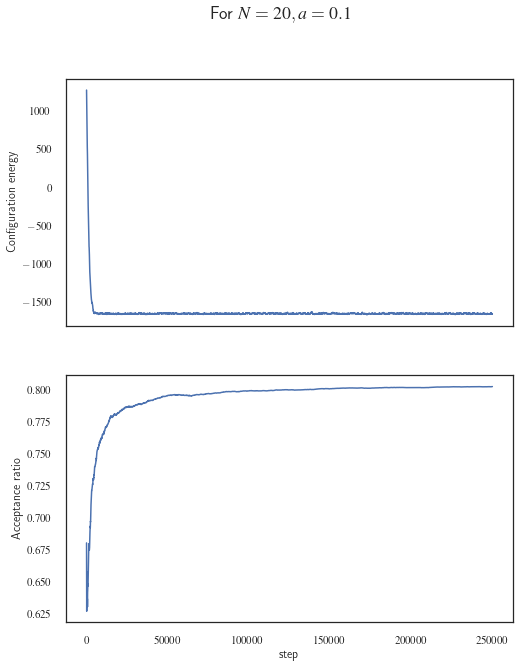

In [426]:
#plotting energy and acceptance ratio
fig, (ax1, ax2) = plt.subplots(2,sharex=True)
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle(r'For $N = 20,a = 0.1$',fontsize = 18)
ax1.plot(step12, energy12)
ax1.set(ylabel='Configuration energy')
ax2.plot(step12, Acc_Rej12)
ax2.set(ylabel = 'Acceptance ratio')
ax2.set(xlabel = 'step')
plt.show()
#plt.savefig('convergence2.jpg')

In [428]:
#considering the burn-in time

del(count01[0:100])
del(count02[0:100])

del(count11[0:100])
del(count12[0:100])

In [427]:
del(count03[0:100])

del(count13[0:100])

del(count23[0:100])
del(count21[0:100])
del(count22[0:100])

In [292]:
def gen_pdf(N,ar):
    k=np.linspace(0.,1.,500)
    pdf = []
    dk = k[1]-k[0]
    pnorm = 0
    for e in k:
        p = np.exp(-beta*N*N*ar*(ar*ar/(12*alpha) + e*e*alpha/3 - ar*e/3))
        pdf.append(p)
        pnorm+=p*dk
    pdf = [ele/pnorm for ele in pdf]
    return k,pdf

In [435]:
def gen_pdf_new(N,ar):
    k=np.linspace(-3.,0.,500)
    pdf = []
    dk = k[1]-k[0]
    pnorm = 0
    for e in k:
        p = -beta*N*N*ar*(ar*(3-2*e)+2*alpha*(e*e-3))/6
        pdf.append(p)
        pnorm+=p*dk
    pdf = [ele/pnorm for ele in pdf]
    return k,pdf

In [436]:
k00,p00 = gen_pdf_new(N_a[0],a[0])
k01,p01 = gen_pdf_new(N_a[0],a[1])
k02,p02 = gen_pdf_new(N_a[0],a[2])
k03,p03 = gen_pdf_new(N_a[0],a[3])
k04,p04 = gen_pdf_new(N_a[0],a[4])

k10,p10 = gen_pdf_new(N_a[1],a[0])
k11,p11 = gen_pdf_new(N_a[1],a[1])
k12,p12 = gen_pdf_new(N_a[1],a[2])
k13,p13 = gen_pdf_new(N_a[1],a[3])
k14,p14 = gen_pdf_new(N_a[1],a[4])

k20,p20 = gen_pdf_new(N_a[2],a[0])
k21,p21 = gen_pdf_new(N_a[2],a[1])
k22,p22 = gen_pdf_new(N_a[2],a[2])
k23,p23 = gen_pdf_new(N_a[2],a[3])
k24,p24 = gen_pdf_new(N_a[2],a[4])

In [ ]:
k00,p00 = gen_pdf(N_a[0],a[0])
k01,p01 = gen_pdf(N_a[0],a[1])
k02,p02 = gen_pdf(N_a[0],a[2])
k03,p03 = gen_pdf(N_a[0],a[3])
k04,p04 = gen_pdf(N_a[0],a[4])

k10,p10 = gen_pdf(N_a[1],a[0])
k11,p11 = gen_pdf(N_a[1],a[1])
k12,p12 = gen_pdf(N_a[1],a[2])
k13,p13 = gen_pdf(N_a[1],a[3])
k14,p14 = gen_pdf(N_a[1],a[4])

k20,p20 = gen_pdf(N_a[2],a[0])
k21,p21 = gen_pdf(N_a[2],a[1])
k22,p22 = gen_pdf(N_a[2],a[2])
k23,p23 = gen_pdf(N_a[2],a[3])
k24,p24 = gen_pdf(N_a[2],a[4])

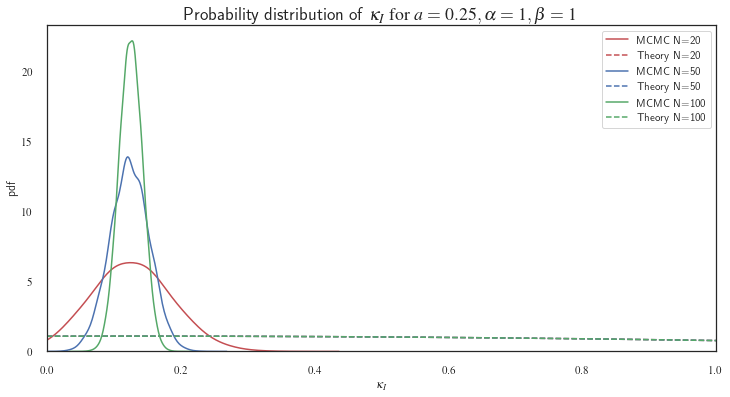

In [375]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,6))
plt.title(r'Probability distribution of $\log\kappa_I \textrm{ for } a = 0.25,\alpha=1,\beta=1$',fontsize = 18)
sns.kdeplot(count00,bw_adjust=3.8,ax=ax,color ='r',label='MCMC N=20')
plt.plot(k00,p00, 'r--', label = 'Theory N=20')
sns.kdeplot(count10,bw_adjust=2.5,ax=ax,color ='b',label='MCMC N=50')
plt.plot(k10,p10, 'b--', label = 'Theory N=50')
sns.kdeplot(count20,bw_adjust=2.8,ax=ax,color ='g',label='MCMC N=100')
plt.plot(k20,p20, 'g--', label = 'Theory N=100')
plt.ylabel('pdf')
plt.xlabel(r'$\kappa_I$')
plt.xlim(0.,1.)
plt.legend()
#plt.show()
#plt.savefig('aa1.jpg')

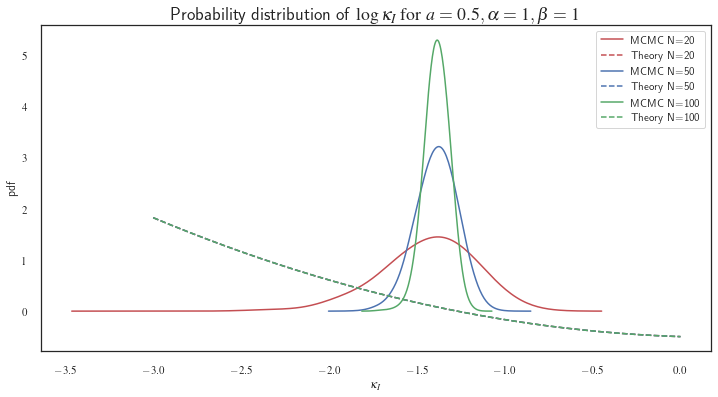

In [437]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,6))
plt.title(r'Probability distribution of $\log\kappa_I \textrm{ for } a = 0.5,\alpha=1,\beta=1$',fontsize = 18)
sns.kdeplot(count01,bw_adjust=3.5,ax=ax,color ='r',label='MCMC N=20')
plt.plot(k01,p01, 'r--', label = 'Theory N=20')
sns.kdeplot(count11,bw_adjust=2.8,ax=ax,color ='b',label='MCMC N=50')
plt.plot(k11,p11, 'b--', label = 'Theory N=50')
sns.kdeplot(count21,bw_adjust=2.6,ax=ax,color ='g',label='MCMC N=100')
plt.plot(k21,p21, 'g--', label = 'Theory N=100')
plt.ylabel('pdf')
plt.xlabel(r'$\kappa_I$')
#plt.xlim(0.,1.)
plt.legend()
#plt.show()
#plt.savefig('aa2.jpg')

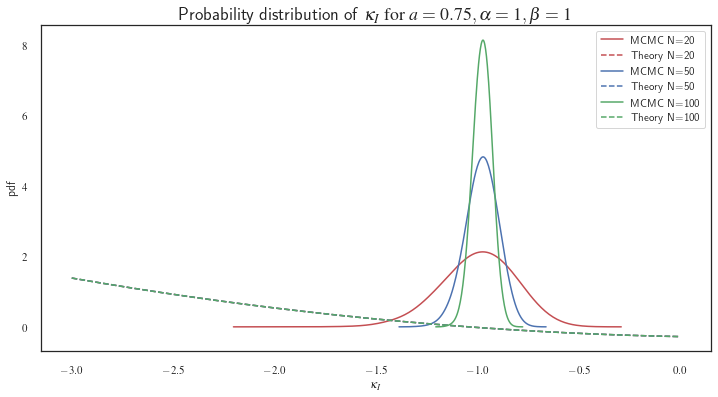

In [438]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,6))
plt.title(r'Probability distribution of $\kappa_I \textrm{ for } a = 0.75,\alpha=1,\beta=1$',fontsize = 18)
sns.kdeplot(count02,bw_adjust=3.5,ax=ax,color ='r',label='MCMC N=20')
plt.plot(k02,p02, 'r--', label = 'Theory N=20')
sns.kdeplot(count12,bw_adjust=2.8,ax=ax,color ='b',label='MCMC N=50')
plt.plot(k12,p12, 'b--', label = 'Theory N=50')
sns.kdeplot(count22,bw_adjust=2.8,ax=ax,color ='g',label='MCMC N=100')
plt.plot(k22,p22, 'g--', label = 'Theory N=100')
plt.ylabel('pdf')
plt.xlabel(r'$\kappa_I$')
#plt.xlim(0.,1.)
plt.legend()
#plt.show()
#plt.savefig('aa3.jpg')

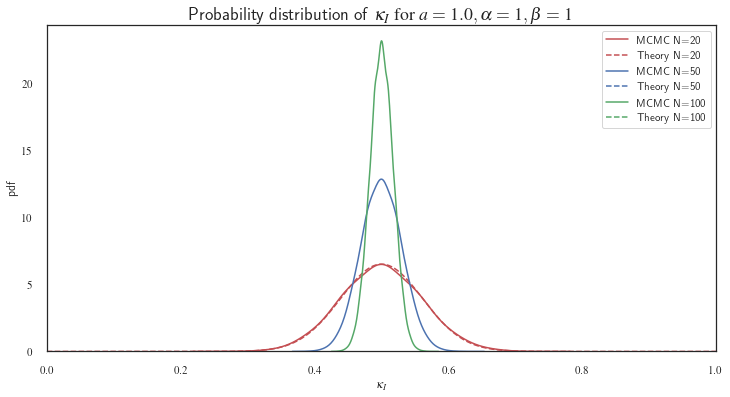

In [336]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,6))
plt.title(r'Probability distribution of $\kappa_I \textrm{ for } a = 1.0,\alpha=1,\beta=1$',fontsize = 18)
sns.kdeplot(count03,bw_adjust=3.5,ax=ax,color ='r',label='MCMC N=20')
plt.plot(k03,p03, 'r--', label = 'Theory N=20')
sns.kdeplot(count13,bw_adjust=2.8,ax=ax,color ='b',label='MCMC N=50')
plt.plot(k13,p13, 'b--', label = 'Theory N=50')
sns.kdeplot(count23,bw_adjust=2.6,ax=ax,color ='g',label='MCMC N=100')
plt.plot(k23,p23, 'g--', label = 'Theory N=100')
plt.ylabel('pdf')
plt.xlabel(r'$\kappa_I$')
plt.xlim(0.,1.)
plt.legend()
#plt.show()
#plt.savefig('aa4.jpg')

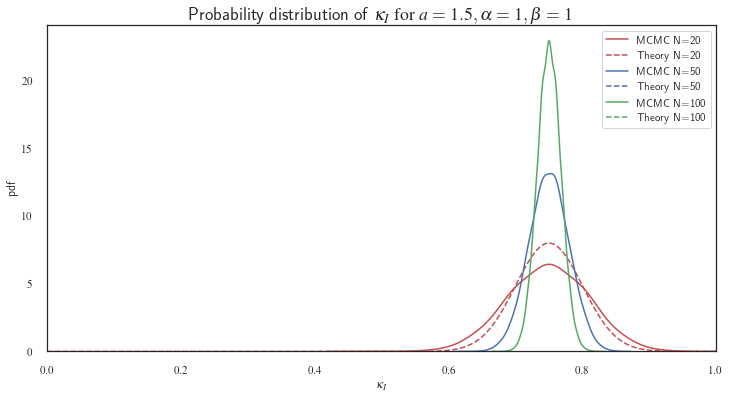

In [337]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,6))
plt.title(r'Probability distribution of $\kappa_I \textrm{ for } a = 1.5,\alpha=1,\beta=1$',fontsize = 18)
sns.kdeplot(count04,bw_adjust=3.5,ax=ax,color ='r',label='MCMC N=20')
plt.plot(k04,p04, 'r--', label = 'Theory N=20')
sns.kdeplot(count14,bw_adjust=2.8,ax=ax,color ='b',label='MCMC N=50')
plt.plot(k14,p14, 'b--', label = 'Theory N=50')
sns.kdeplot(count24,bw_adjust=2.6,ax=ax,color ='g',label='MCMC N=100')
plt.plot(k24,p24, 'g--', label = 'Theory N=100')
plt.ylabel('pdf')
plt.xlabel(r'$\kappa_I$')
plt.xlim(0.,1.)
plt.legend()
#plt.show()
plt.savefig('aa5.jpg')

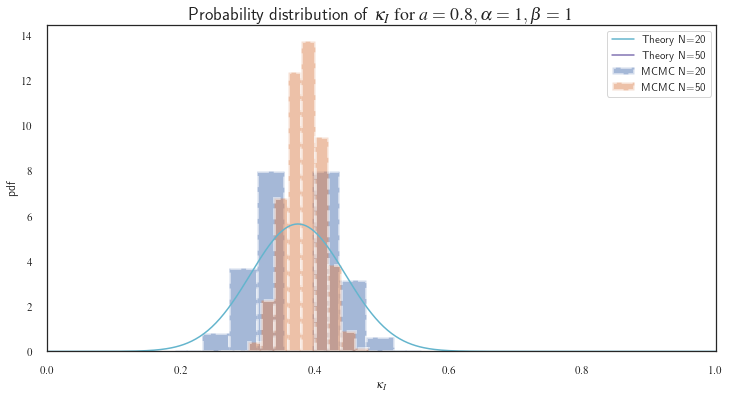

In [338]:
plt.figure(figsize = (12,6))
plt.title(r'Probability distribution of $\kappa_I \textrm{ for } a = 0.8,\alpha=1,\beta=1$',fontsize = 18)
plt.hist(count02, bins = 11, ls='dashed', alpha = 0.5, lw=3, density = True, label = 'MCMC N=20')
plt.hist(count12, bins = 11, ls='dashed', alpha = 0.5, lw=3, density = True, label = 'MCMC N=50')
plt.plot(k02,p02,color = 'c',label = 'Theory N=20')
plt.plot(k12,p12,color = 'm',label = 'Theory N=50')
#plt.ylim(0.0,0.6)
plt.xlim(0,1)
plt.legend()
plt.ylabel('pdf')
plt.xlabel(r'$\kappa_I$')
#plt.grid()
plt.show()
#plt.savefig('a3.jpg')

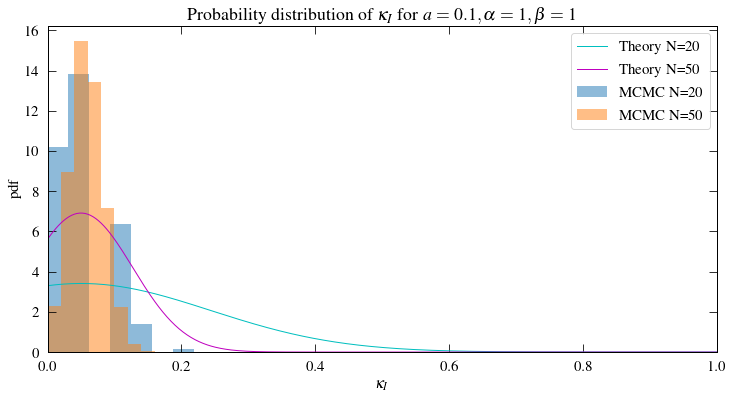

In [211]:
plt.figure(figsize = (12,6))
plt.title(r'Probability distribution of $\kappa_I \textrm{ for } a = 0.1,\alpha=1,\beta=1$',fontsize = 18)
plt.hist(count00, bins=8, ls='dashed', alpha = 0.5, lw=3, density = True, label = 'MCMC N=20')
plt.hist(count10, bins=8, ls='dashed', alpha = 0.5, lw=3, density = True, label = 'MCMC N=50')
plt.plot(k00,p00, color = 'c', label = 'Theory N=20')
plt.plot(k10,p10, color = 'm', label = 'Theory N=50')
#plt.ylim(0.0,0.6)
plt.xlim(0,1)
plt.legend()
plt.ylabel('pdf')
plt.xlabel(r'$\kappa_I$')
#plt.grid()
#plt.show()
plt.savefig('a1.jpg')

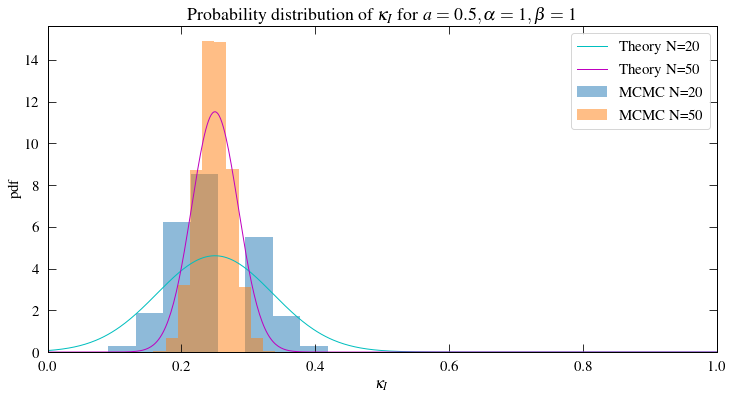

In [215]:
plt.figure(figsize = (12,6))
plt.title(r'Probability distribution of $\kappa_I \textrm{ for } a = 0.5,\alpha=1,\beta=1$',fontsize = 18)
plt.hist(count01, bins = 11, ls='dashed', alpha = 0.5, lw=3, density = True, label = 'MCMC N=20')
plt.hist(count11, bins = 11, ls='dashed', alpha = 0.5, lw=3, density = True, label = 'MCMC N=50')
plt.plot(k01,p01, color = 'c', label = 'Theory N=20')
plt.plot(k11,p11, color = 'm', label = 'Theory N=50')
#plt.ylim(0.0,0.6)
plt.xlim(0,1)
plt.legend()
plt.ylabel('pdf')
plt.xlabel(r'$\kappa_I$')
#plt.grid()
#plt.show()
plt.savefig('a2.jpg')

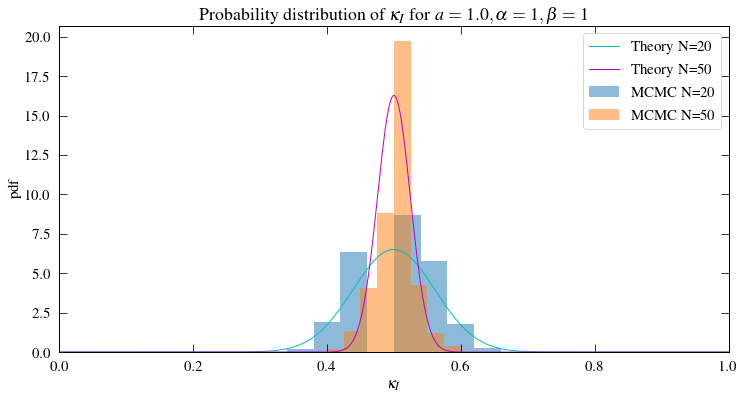

In [216]:
plt.figure(figsize = (12,6))
plt.title(r'Probability distribution of $\kappa_I \textrm{ for } a = 1.0,\alpha=1,\beta=1$',fontsize = 18)
plt.hist(count03, bins=10, ls='dashed', alpha = 0.5, lw=3, density = True, label = 'MCMC N=20')
plt.hist(count13, bins=8, ls='dashed', alpha = 0.5, lw=3, density = True, label = 'MCMC N=50')
plt.plot(k01,p03, color = 'c', label = 'Theory N=20')
plt.plot(k11,p13, color = 'm', label = 'Theory N=50')
#plt.ylim(0.0,0.6)
plt.xlim(0,1)
plt.legend()
plt.ylabel('pdf')
plt.xlabel(r'$\kappa_I$')
#plt.grid()
#plt.show()
plt.savefig('a4.jpg')

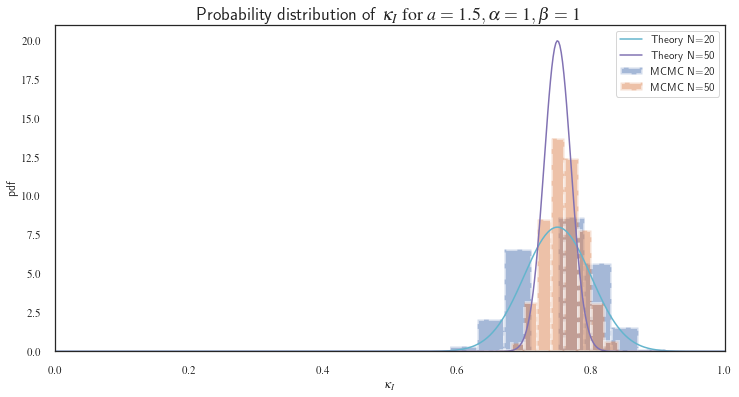

In [243]:
plt.figure(figsize = (12,6))
plt.title(r'Probability distribution of $\kappa_I \textrm{ for } a = 1.5,\alpha=1,\beta=1$',fontsize = 18)
plt.hist(count04, bins=10, ls='dashed', alpha = 0.5, lw=3, density = True, label = 'MCMC N=20')
plt.hist(count14, bins=10, ls='dashed', alpha = 0.5, lw=3, density = True, label = 'MCMC N=50')
plt.plot(k01,p04, color = 'c', label = 'Theory N=20')
plt.plot(k11,p14, color = 'm', label = 'Theory N=50')
#plt.ylim(0.0,0.6)
plt.xlim(0,1)
plt.legend()
plt.ylabel('pdf')
plt.xlabel(r'$\kappa_I$')
#plt.grid()
#plt.show()
plt.savefig('a5.jpg')